# CAT VS DOG

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 212MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2


In [6]:
training_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [7]:
validation_data = keras.utils.image_dataset_from_directory(
    directory ='/content/test' ,
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [12]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
training_data = training_data.map(process)
validation_data= validation_data.map(process)

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3))),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])


In [24]:
history = model.fit(training_data,validation_data=validation_data,epochs=10)

Epoch 1/10
625/625 [==============================] - 78s 123ms/step - loss: 0.6116 - accuracy: 0.6571 - val_loss: 50376.3555 - val_accuracy: 0.5004
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.5063 - accuracy: 0.7520 - val_loss: 87440.3047 - val_accuracy: 0.5286
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3861 - accuracy: 0.8240 - val_loss: 57143.4766 - val_accuracy: 0.6068
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 0.2343 - accuracy: 0.9012 - val_loss: 165148.9844 - val_accuracy: 0.5474
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.1136 - accuracy: 0.9560 - val_loss: 346443.1875 - val_accuracy: 0.5094
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.0809 - accuracy: 0.9704 - val_loss: 174973.9844 - val_accuracy: 0.5724
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.0528 - accuracy: 0.9829 

<function matplotlib.pyplot.show(*args, **kw)>

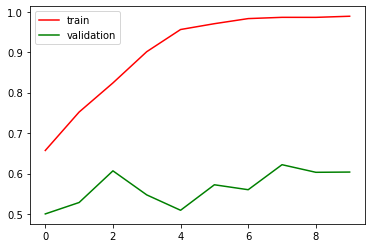

In [25]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'green',label = 'validation')
plt.legend()
plt.show

In [57]:
test_img = cv2.imread("/content/cat2.jpg")

In [58]:
test_img .shape

(168, 300, 3)

In [59]:
test_img = cv2.resize(test_img ,(256,256)) 

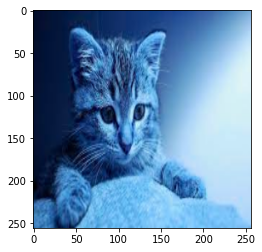

In [60]:
plt.imshow(test_img )

In [61]:
test = test_img.reshape((1,256,256,3)) 

In [63]:
result = model.predict(test)

1/1 [==============================] - 0s 16ms/step


In [64]:
if result == 0:
  print('its cat')
else:
  print('its dog')  

its cat
